<a href="https://colab.research.google.com/github/pegahahadian/Covid19_Vaccines/blob/master/AB-NYC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:


from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import numpy as np 
import os 
import pandas as pd



In [ ]:
from google.colab import files 
  
  
uploaded = files.upload()

Saving AB_NYC_2019(1).csv to AB_NYC_2019(1).csv


In [ ]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [ ]:


# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()



In [ ]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [ ]:
import pandas as pd 


nRowsRead = 1000
df1 = pd.read_csv('AB_NYC_2019(1).csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'AB_NYC_2019(1).csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 16 columns


In [ ]:
df1.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


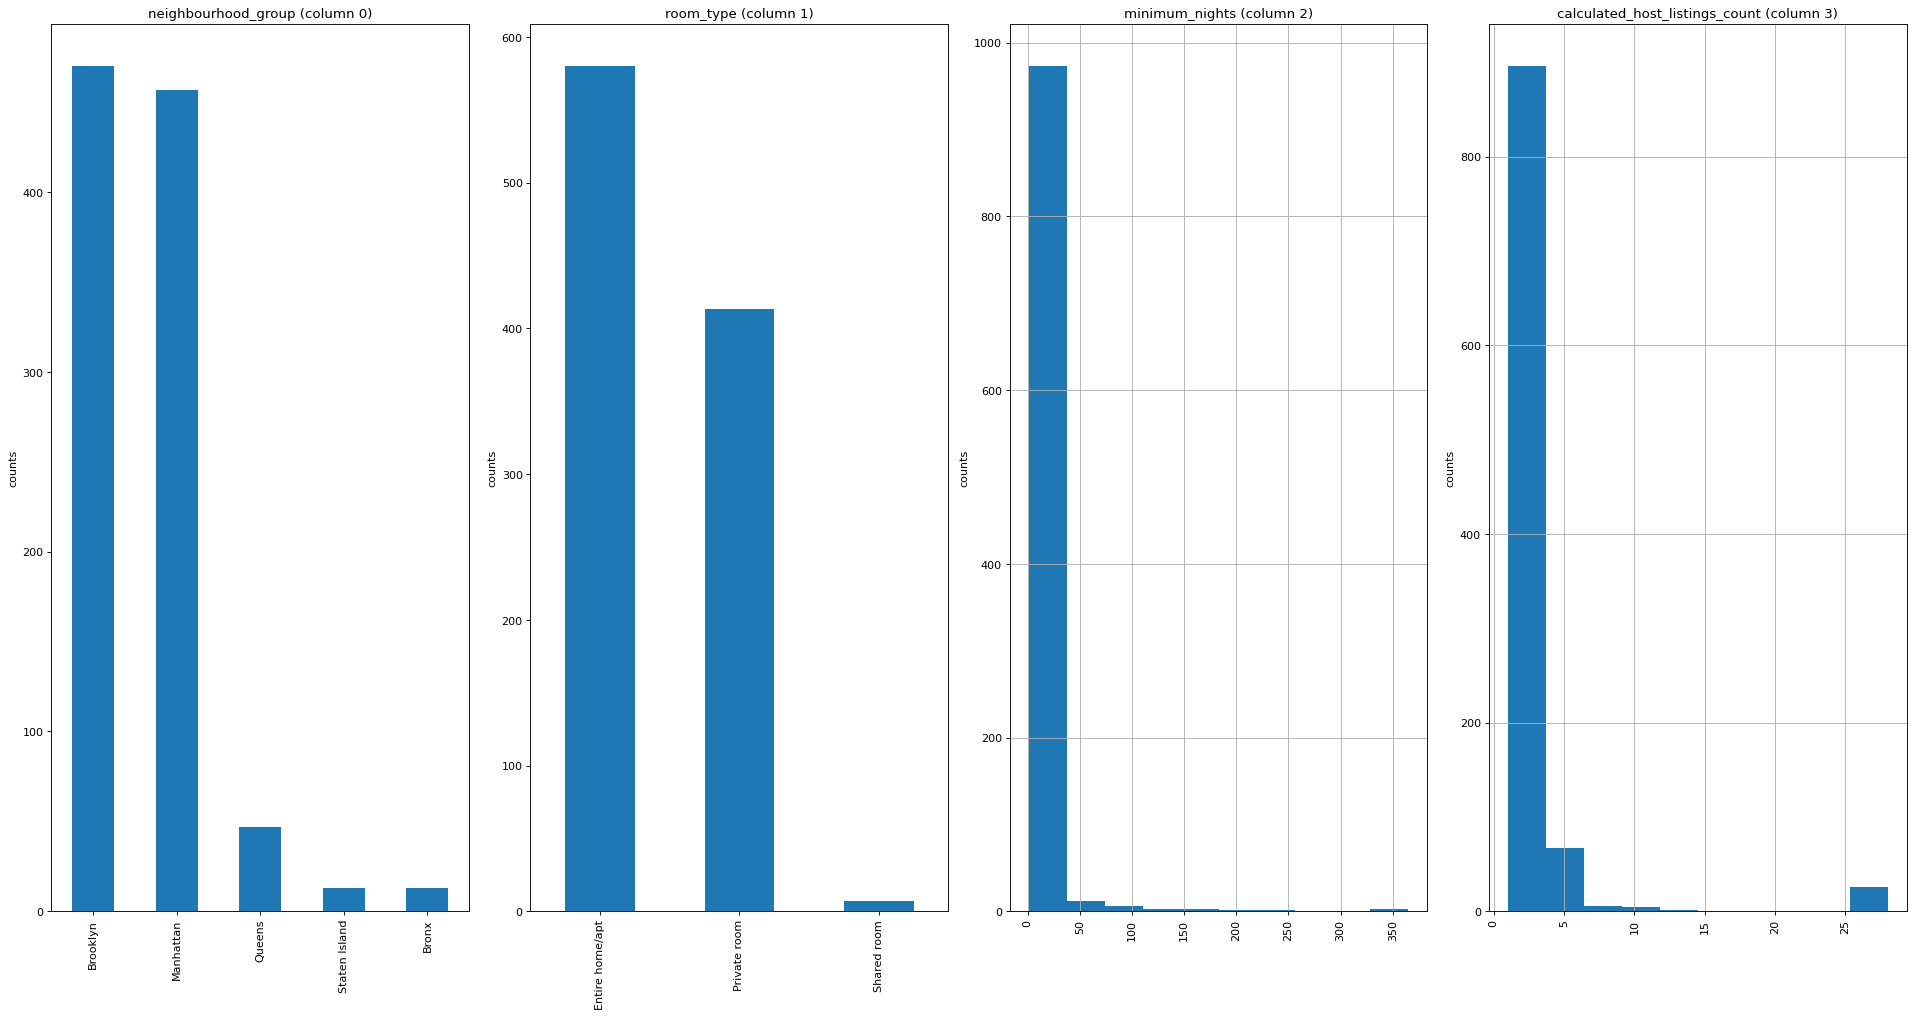

In [ ]:
import matplotlib.pyplot as plt
import numpy as np 
plotPerColumnDistribution(df1, 10, 5)


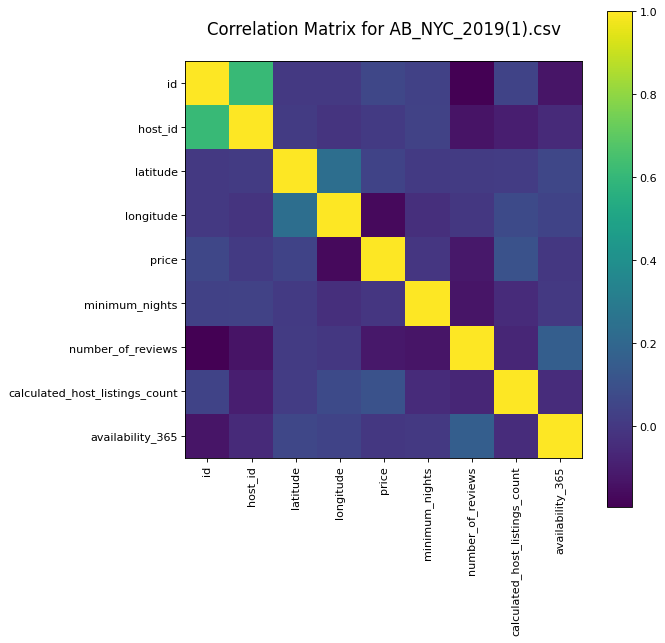

In [ ]:
plotCorrelationMatrix(df1, 8)

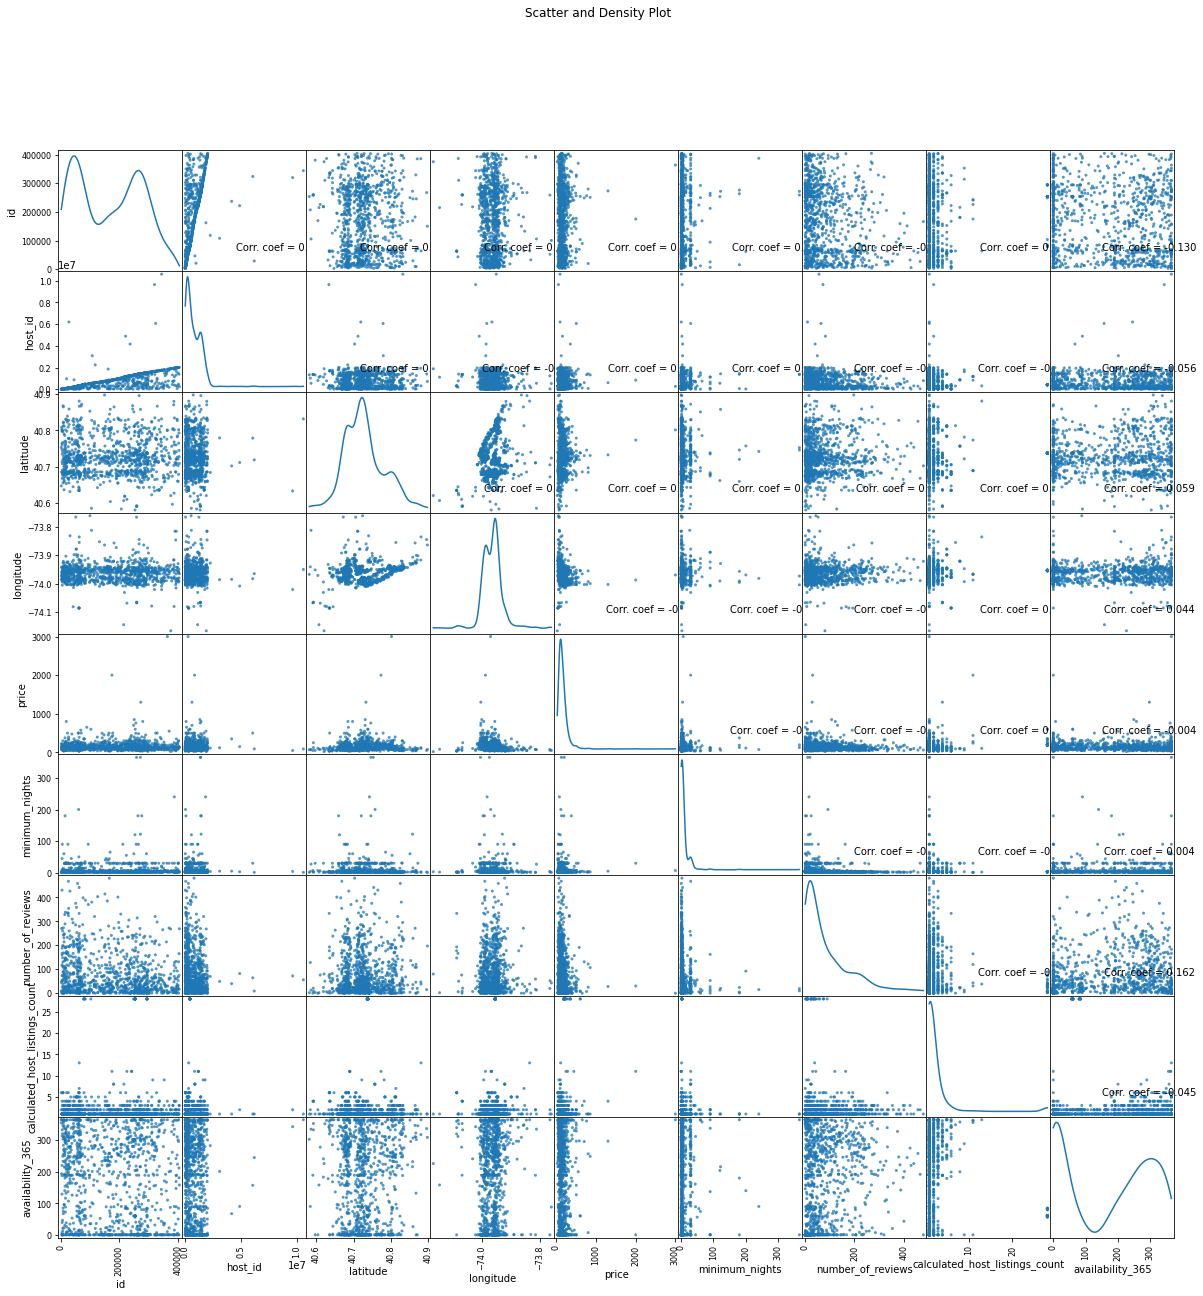

In [ ]:
plotScatterMatrix(df1, 20, 10)

In [ ]:
import pandas as pd 
import io 
  
df = pd.read_csv(io.BytesIO(uploaded['AB_NYC_2019(1).csv'])) 
df.head(10)

corr = df.corr() 
cm = sns.light_palette("green", as_cmap=True) 
cm = sns.diverging_palette(220, 20, sep=20, as_cmap=True) 
corr.style.background_gradient(cmap=cm).set_precision(2) 

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.00,0.59,-0.00,0.09,0.01,-0.01,-0.32,0.29,0.13,0.09
host_id,0.59,1.00,0.02,0.13,0.02,-0.02,-0.14,0.30,0.15,0.20
latitude,-0.00,0.02,1.00,0.08,0.03,0.02,-0.02,-0.01,0.02,-0.01
longitude,0.09,0.13,0.08,1.00,-0.15,-0.06,0.06,0.15,-0.11,0.08
price,0.01,0.02,0.03,-0.15,1.00,0.04,-0.05,-0.03,0.06,0.08
minimum_nights,-0.01,-0.02,0.02,-0.06,0.04,1.00,-0.08,-0.12,0.13,0.14
number_of_reviews,-0.32,-0.14,-0.02,0.06,-0.05,-0.08,1.00,0.55,-0.07,0.17
reviews_per_month,0.29,0.30,-0.01,0.15,-0.03,-0.12,0.55,1.00,-0.01,0.19
calculated_host_listings_count,0.13,0.15,0.02,-0.11,0.06,0.13,-0.07,-0.01,1.00,0.23
availability_365,0.09,0.20,-0.01,0.08,0.08,0.14,0.17,0.19,0.23,1.00


In [ ]:
#FOOTBALL/ Exer 2

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np 
import os 
import pandas as pd 

In [ ]:
from google.colab import files 
  
  
uploaded = files.upload()

Saving results.csv to results.csv


In [ ]:
import pandas as pd 
import io 
  
df = pd.read_csv(io.BytesIO(uploaded['results.csv'])) 
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [ ]:
df.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

In [ ]:
def return_winner(x):
    y= pd.DataFrame(x)
    return y['date']

In [ ]:
df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
41871,2020-11-18,Greece,Slovenia,0,0,UEFA Nations League,Athens,Greece,False
41872,2020-11-18,Albania,Belarus,3,2,UEFA Nations League,Tirana,Albania,False
41873,2020-11-18,Kazakhstan,Lithuania,1,2,UEFA Nations League,Almaty,Kazakhstan,False
41874,2020-12-04,Qatar,Bangladesh,5,0,FIFA World Cup qualification,Doha,Qatar,False


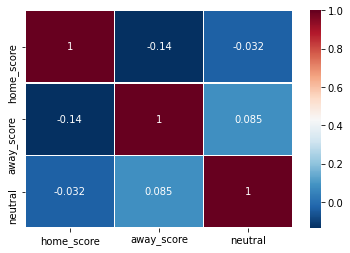

In [ ]:
import pandas as pd 
import io 
import seaborn as sns
import seaborn as sb

df = pd.read_csv(io.BytesIO(uploaded['results.csv'])) 
df.head(10)
pearsoncorr = df.corr(method='pearson')
pearsoncorr
sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)